# Data Preparation 

Show and explain all steps involved in your assignment – Data Import, Data Cleaning, Data Preview, Data Description. Must have flow chart.


## First View of the data

## Loading Data

In [30]:
import pandas as pd
import numpy as np
from pprint import pprint
data_file_path = ""
csv_file_name = "Austin Bicycle Crashes 2010-2017.csv"
dataset = pd.read_csv(data_file_path+csv_file_name)
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,City,...,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Person Type
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,Austin,...,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",Pedalcyclist
1,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
2,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
3,12112069,No,No,No Data,Austin Police Department,False,No Data,No Data,100010834,Austin,...,On Roadway,No Data,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,Pedalcyclist
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,Austin,...,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn,Pedalcyclist


## Visualizing missing value

<AxesSubplot:>

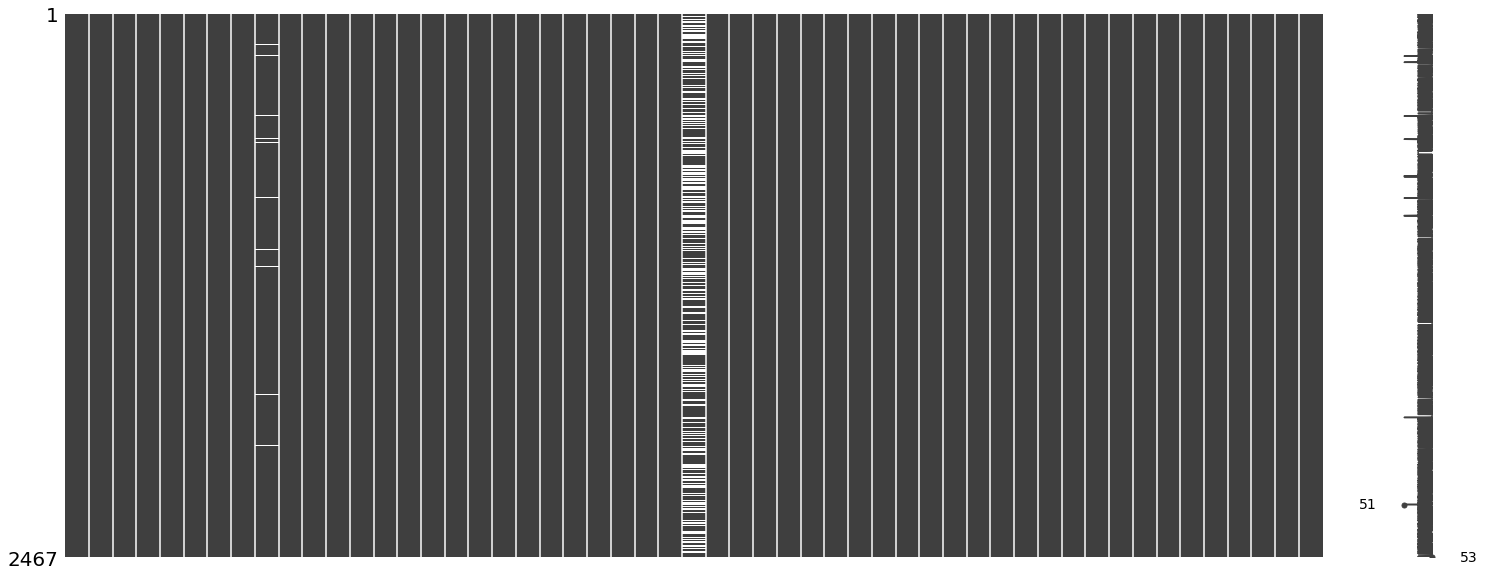

In [31]:
import missingno as msno
msno.matrix(dataset)

In [32]:
dataset.count().max() # see there are how records

2467

In [33]:
dataset.dtypes

Crash ID                                      int64
$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
Adjusted Average Daily Traffic Amount        object
Agency                                       object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Average Daily Traffic Year                   object
Case ID                                      object
City                                         object
Construction Zone Flag                       object
Construction Zone Workers Present Flag       object
County                                       object
Crash Death Count                             int64
Crash Incapacitating Injury Count             int64
Crash Non-incapacitating Injury Count         int64
Crash Not Injured Count                       int64
Crash Possible Injury Count                   int64
Crash Severity                               object
Crash Time  

## Checking Data
Note that: it is easier to view the data superficially using Excel

The data are revised by going through each 10 of all variables

In [34]:
# uni abbrv. one
uni_col = list(filter(lambda c: len(dataset[c].unique()) == 1, dataset))
uni_dict = {k:dataset[k].unique()[0] for k in uni_col}
uni_dict

{'City': 'Austin',
 'County': 'Travis',
 'Population Group': '250,000 Pop And Over',
 'Person Type': 'Pedalcyclist'}

Above are the columns whose all data is all of a kind

In [35]:
# remove the column that has only one unique data
dataset.drop([col for col in uni_dict],axis = 1, inplace=True)

In [36]:
dataset.replace(["No Data"], pd.NA, inplace=True)

Remark: There is a field `street number` use `"NO DATA"` and might be up to a interpretation that where `street number` is no applicable to every street. Hence, we keep it as it is, then evaluated later on demand.

In [37]:
# see there are how many variables
len(list(dataset.dtypes))

49

In [38]:
def leg_stepping(start, end,step = 1):
	'''
		eg.: it = leg_stepping(1, 10, 3)
		print(next(it)) -> (1, 4)
		print(next(it)) -> (5, 8)
		print(next(it)) -> (9, 10)
	'''
	assert(start < end)
	while start+step < end:
		yield {"start": start, "end": start+step}
		start += step+1
	yield {"start": start, "end": end}
ind_iter = leg_stepping(0, len(list(dataset.dtypes)), 10)
tmp_viewer = lambda curr: dataset.iloc[:, curr["start"]:curr["end"]]

In [39]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag
0,11243623,No,No,15262,Austin Police Department,False,15262,2014,100010723,No
1,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
2,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
3,12112069,No,No,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,No
4,11376123,No,No,22775,Austin Police Department,False,22775,2014,100042009,No


In [40]:
li = ["$1000 Damage to Any One Person's Property", "Active School Zone Flag", "Construction Zone Flag"]
{c:dataset[c].unique() for c in li} # check if binary

{"$1000 Damage to Any One Person's Property": array(['No', 'Yes'], dtype=object),
 'Active School Zone Flag': array(['No', 'Yes'], dtype=object),
 'Construction Zone Flag': array(['No', 'Yes'], dtype=object)}

In [41]:
def booleanize(s, true_corrpd, false_corrpd):
	s = s.replace(true_corrpd, True)
	s = s.replace(false_corrpd, False)
	return s

In [42]:
# changing the yes/no to boolean values
li = ["$1000 Damage to Any One Person's Property", "Active School Zone Flag", "Construction Zone Flag"]
dataset.loc[:,li] = booleanize(dataset.loc[:,li], "Yes", "No")

In [43]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice)

,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,Crash Not Injured Count,Crash Possible Injury Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Unknown Injury Count,Crash Year
0,0,1,0,0,0,Incapacitating Injury,239,1,1,2010
1,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
2,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
3,0,0,2,1,0,Non-Incapacitating Injury,310,2,1,2010
4,0,0,1,1,0,Non-Incapacitating Injury,2300,1,0,2010
...,...,...,...,...,...,...,...,...,...,...
2462,0,0,1,1,0,Non-Incapacitating Injury,1254,1,0,2017
2463,0,0,1,1,0,Non-Incapacitating Injury,2048,1,0,2017
2464,0,0,0,2,0,Not Injured,737,0,0,2017
2465,0,0,1,1,0,Non-Incapacitating Injury,930,1,0,2017


In [44]:
import datetime
converter = lambda n: datetime.time(hour = int(n/100), minute = n%100)
dataset['Crash Time'] = dataset['Crash Time'].apply(converter)

In [45]:
tmp_viewer(curr_slice).dtypes

Crash Death Count                         int64
Crash Incapacitating Injury Count         int64
Crash Non-incapacitating Injury Count     int64
Crash Not Injured Count                   int64
Crash Possible Injury Count               int64
Crash Severity                           object
Crash Time                               object
Crash Total Injury Count                  int64
Crash Unknown Injury Count                int64
Crash Year                                int64
dtype: object

In [46]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor
0,Pedalcyclist,Farm To Market,NaN,Non Intersection,30.28608823,"Dark, Lighted",-97.6805777,One Motor Vehicle - Going Straight,4,Not Applicable
1,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
2,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
3,Pedalcyclist,<NA>,NaN,Non Intersection,30.25524478,"Dark, Lighted",-97.74505246,One Motor Vehicle - Going Straight,<NA>,Not Applicable
4,Pedalcyclist,State Loop,E 16TH ST,Intersection Related,30.27959299,"Dark, Not Lighted",-97.70207457,One Motor Vehicle - Going Straight,4,Not Applicable


In [47]:
tmp_viewer(curr_slice).describe()

,First Harmful Event,Highway System,Intersecting Street Name,Intersection Related,Latitude,Light Condition,Longitude,Manner of Collision,Number of Lanes,Other Factor
count,2467,384,1469,2467,2217,2467,2217,2467,353,2467
unique,5,7,545,5,1717,7,1718,10,6,28
top,Pedalcyclist,State Loop,UNKNOWN,Intersection,30.27406572,Daylight,-97.76065126,One Motor Vehicle - Going Straight,4,Not Applicable
freq,2447,161,200,871,16,1717,16,1401,181,1530


In [48]:
dataset["Intersecting Street Name"].replace(np.NAN, pd.NA, inplace=True)

In [49]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Physical Feature 1,Private Drive Flag,Property Damages,Right of Way Usual Width,Road Class,Roadway Alignment,Roadway Part,Roadway Relation,Roadway Type,Speed Limit
0,Not Applicable,No,NONE,100,Farm To Market,"Straight, Hillcrest",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45
1,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
2,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
3,Not Applicable,No,NONE,<NA>,City Street,"Straight, Level",Main/Proper Lane,On Roadway,<NA>,35
4,Not Applicable,No,NONE,160,US & State Highways,"Straight, Level",Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45


In [50]:
dataset["Property Damages"].unique()[0:10] # view portion of it

array(['NONE', 'BICYCLE', 'ELECTRONIC PEDESTRIAN SIGNAL, FIRE HYDRANT',
       'BLUE BICYCLE', 'SCWINN ROAD BIKE', 'MOUNTAIN BIKE',
       'BICYCLE FORKS AND BENT RIM', 'DAMAGE TO BICYCLE', 'BIKE',
       'BICYCLE IS COMPLETELY BROKEN APART'], dtype=object)

In [51]:
dataset["Property Damages"].describe() # there are 83 unique data relatively to the 2152 count

count     2152
unique      83
top       NONE
freq      1993
Name: Property Damages, dtype: object

In [52]:
li = ["Private Drive Flag"]
dataset.loc[:,li] = booleanize(dataset.loc[:,li], "Yes", "No")

In [53]:
curr_slice = next(ind_iter)
tmp_viewer(curr_slice).head()

,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,1487,Dry,None,Clear,Not Worn


In [54]:
tmp_viewer(curr_slice).dtypes

Street Number           object
Surface Condition       object
Traffic Control Type    object
Weather Condition       object
Person Helmet           object
dtype: object

In [55]:
# see domain of these columns
s = ['Surface Condition','Traffic Control Type','Weather Condition','Person Helmet']
{c:dataset[c].unique() for c in s}

{'Surface Condition': array(['Dry', 'Wet', 'Unknown', 'Other (Explain In Narrative)', 'Ice',
        'Sand, Mud, Dirt', 'Standing Water'], dtype=object),
 'Traffic Control Type': array(['Marked Lanes', 'Center Stripe/Divider', 'None', 'Signal Light',
        'Stop Sign', 'Other (Explain In Narrative)', 'Officer',
        'Crosswalk', 'Yield Sign', 'Bike Lane',
        'Signal Light With Red Light Running Camera', 'Warning Sign',
        'Flagman', 'Flashing Red Light', 'Flashing Yellow Light',
        'No Passing Zone'], dtype=object),
 'Weather Condition': array(['Clear', 'Rain', 'Cloudy', 'Unknown', 'Fog',
        'Other (Explain In Narrative)', 'Blowing Sand/Snow'], dtype=object),
 'Person Helmet': array(['Worn, Damaged', 'Not Worn', 'Worn, Unk Damage', 'Unknown If Worn',
        'Worn, Not Damaged'], dtype=object)}

In [56]:
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag,...,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,11243623,False,False,15262,Austin Police Department,False,15262,2014,100010723,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,12112069,False,False,<NA>,Austin Police Department,False,<NA>,<NA>,100010834,False,...,Main/Proper Lane,On Roadway,<NA>,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,11376123,False,False,22775,Austin Police Department,False,22775,2014,100042009,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn


In [57]:
uni_dict

{'City': 'Austin',
 'County': 'Travis',
 'Population Group': '250,000 Pop And Over',
 'Person Type': 'Pedalcyclist'}

In [58]:
def save_df_csv(csv_str, file_name, path=""):
	f = open(path+file_name, "w")
	f.write(csv_str)
	f.close()

extract_file_name = lambda f: f.split(".")[0]
save_df_csv(dataset.to_csv(index=False, line_terminator="\n"),
file_name=f"{extract_file_name(csv_file_name)} revised.csv")

## Cleaning and Pre-process of the Data

In [59]:
import pandas as pd
import numpy as np
from pprint import pprint
data_file_path = ""
csv_file_name = "Austin Bicycle Crashes 2010-2017 revised.csv"
dataset = pd.read_csv(data_file_path+csv_file_name)
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag,...,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,11243623,False,False,15262.0,Austin Police Department,False,15262.0,2014.0,100010723,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,11376123,False,False,22775.0,Austin Police Department,False,22775.0,2014.0,100042009,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn


<AxesSubplot:>

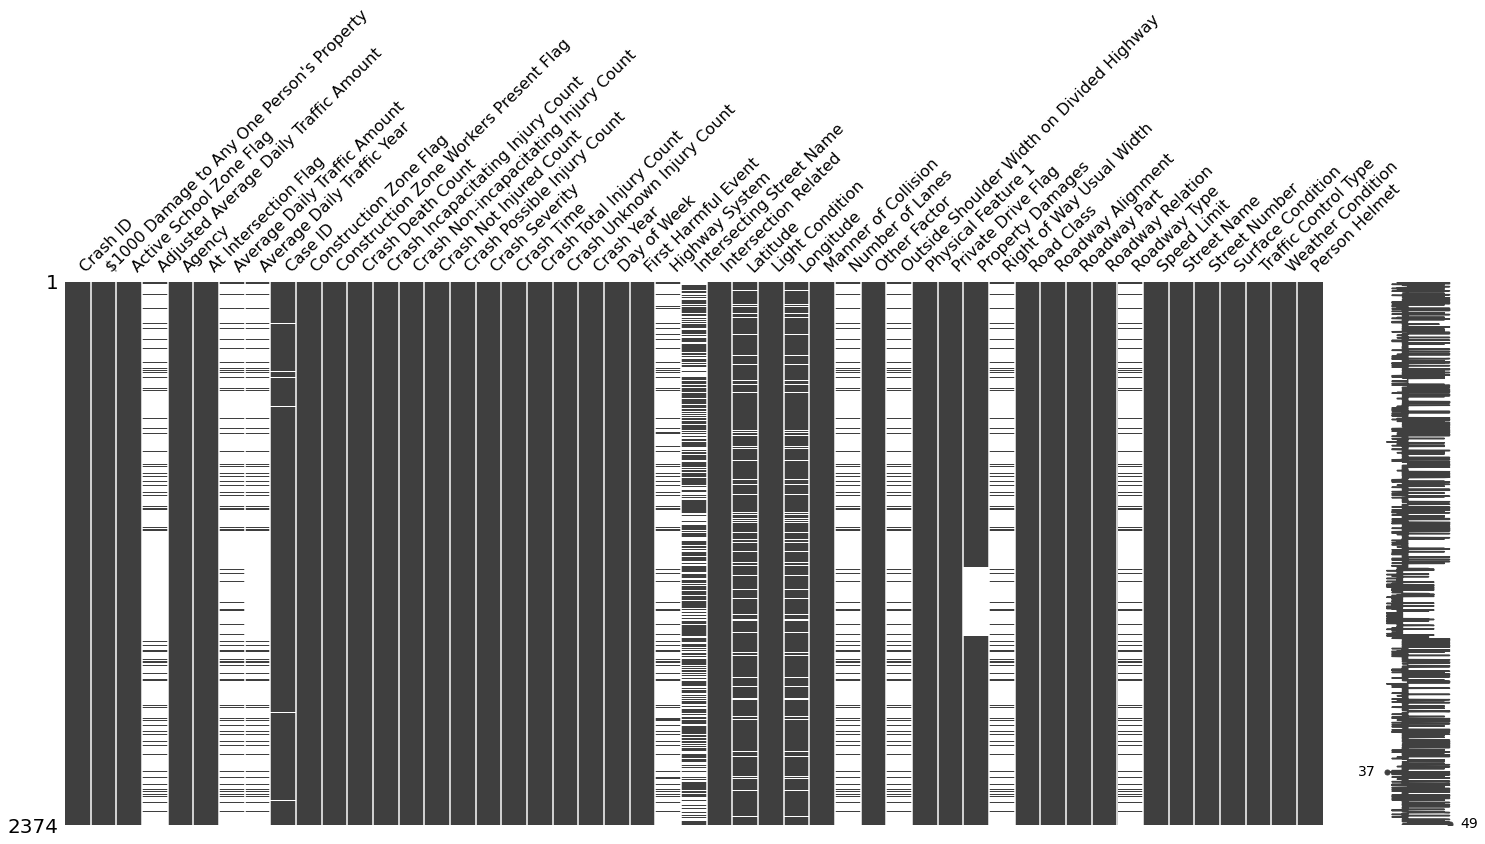

In [60]:
dataset.drop_duplicates('Crash ID', inplace=True) # assuming Crash ID is the primary key
# Visualising missing value
import missingno as msno
msno.matrix(dataset)

<AxesSubplot:>

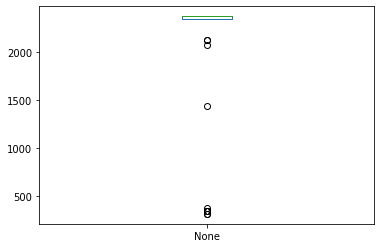

In [61]:
# another visualization of missing values based on counting
dataset.count().plot.box()

### Dropping Column

In [62]:
# from previous boxplot, we decide drop the columns whose counts less then 2000
# (i.e.: having too much missing value)
li = filter(lambda col_nm: dataset[col_nm].count() < 2000, dataset)
li = list(li)
li # the list of columns will be drop

['Adjusted Average Daily Traffic Amount',
 'Average Daily Traffic Amount',
 'Average Daily Traffic Year',
 'Highway System',
 'Intersecting Street Name',
 'Number of Lanes',
 'Outside Shoulder Width on Divided Highway',
 'Right of Way Usual Width',
 'Roadway Type']

In [63]:
dataset.drop(li, axis=1, inplace=True)

In [64]:
dataset.count(1)[0] # number of variables

40

<AxesSubplot:>

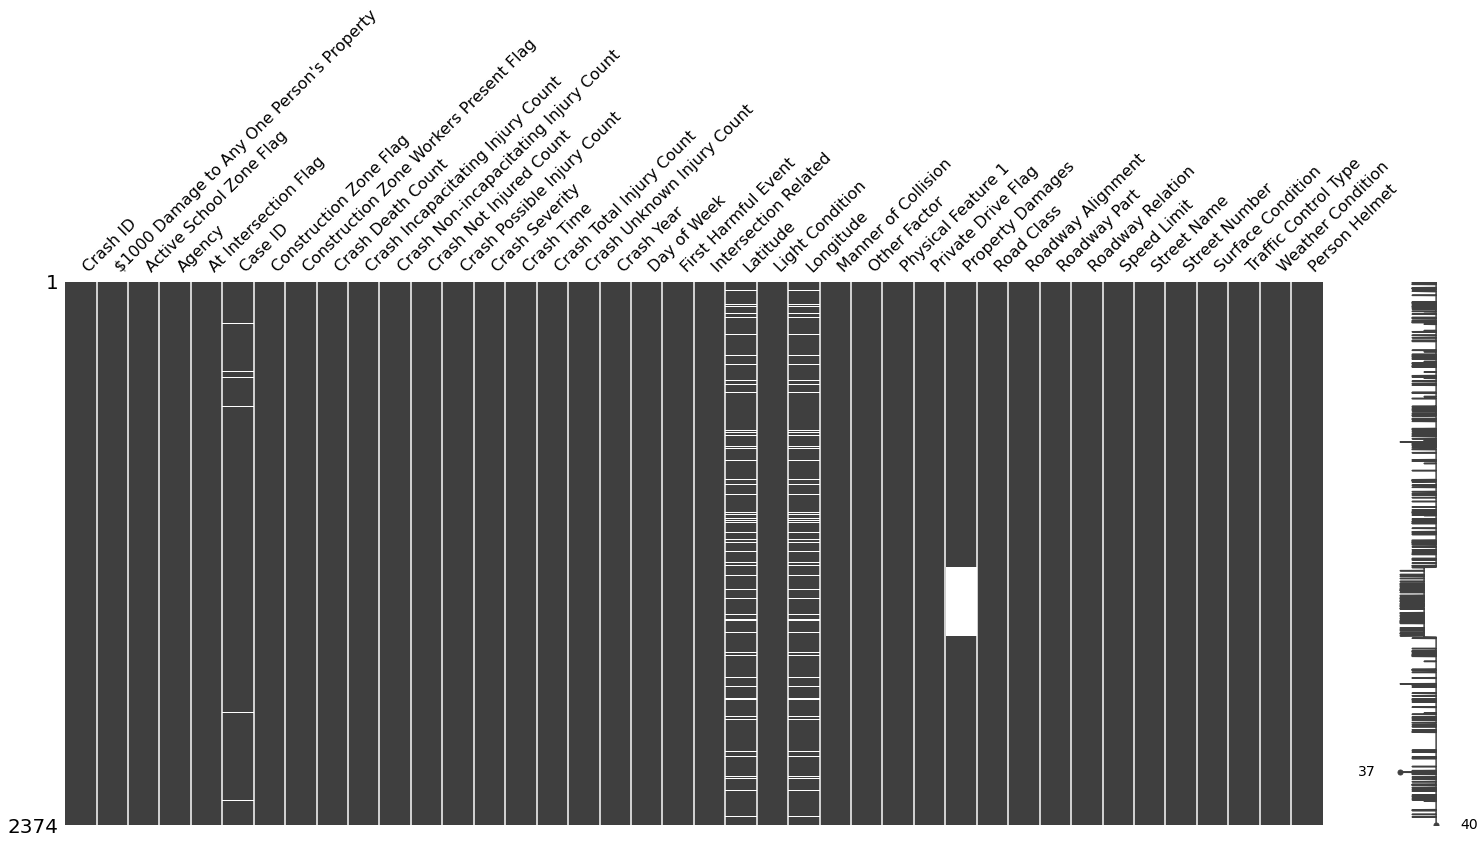

In [65]:
import missingno as msno
msno.matrix(dataset)

### Dropping Row

<AxesSubplot:>

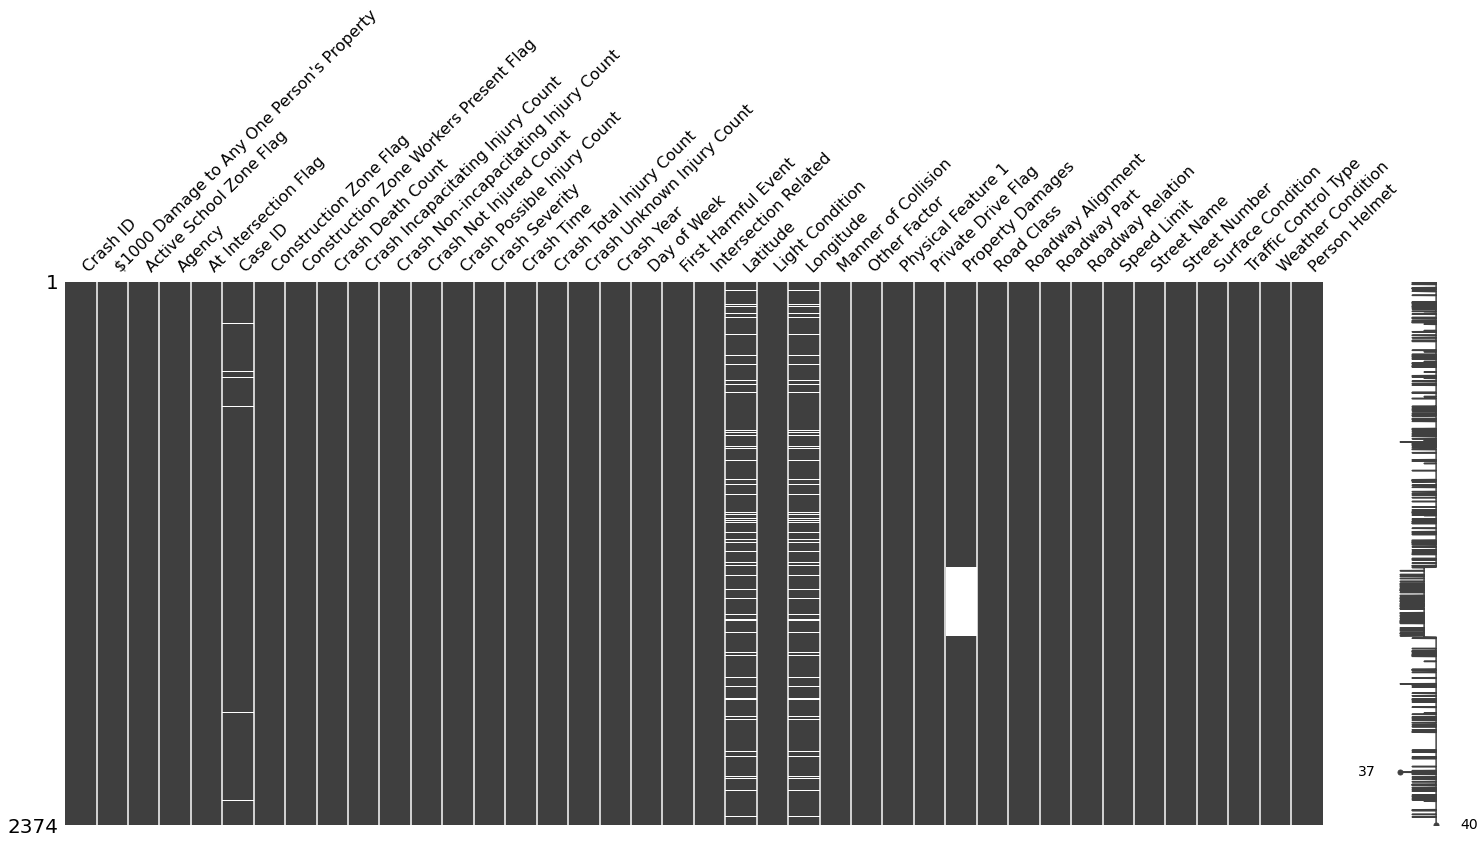

In [66]:
msno.matrix(dataset)

<AxesSubplot:>

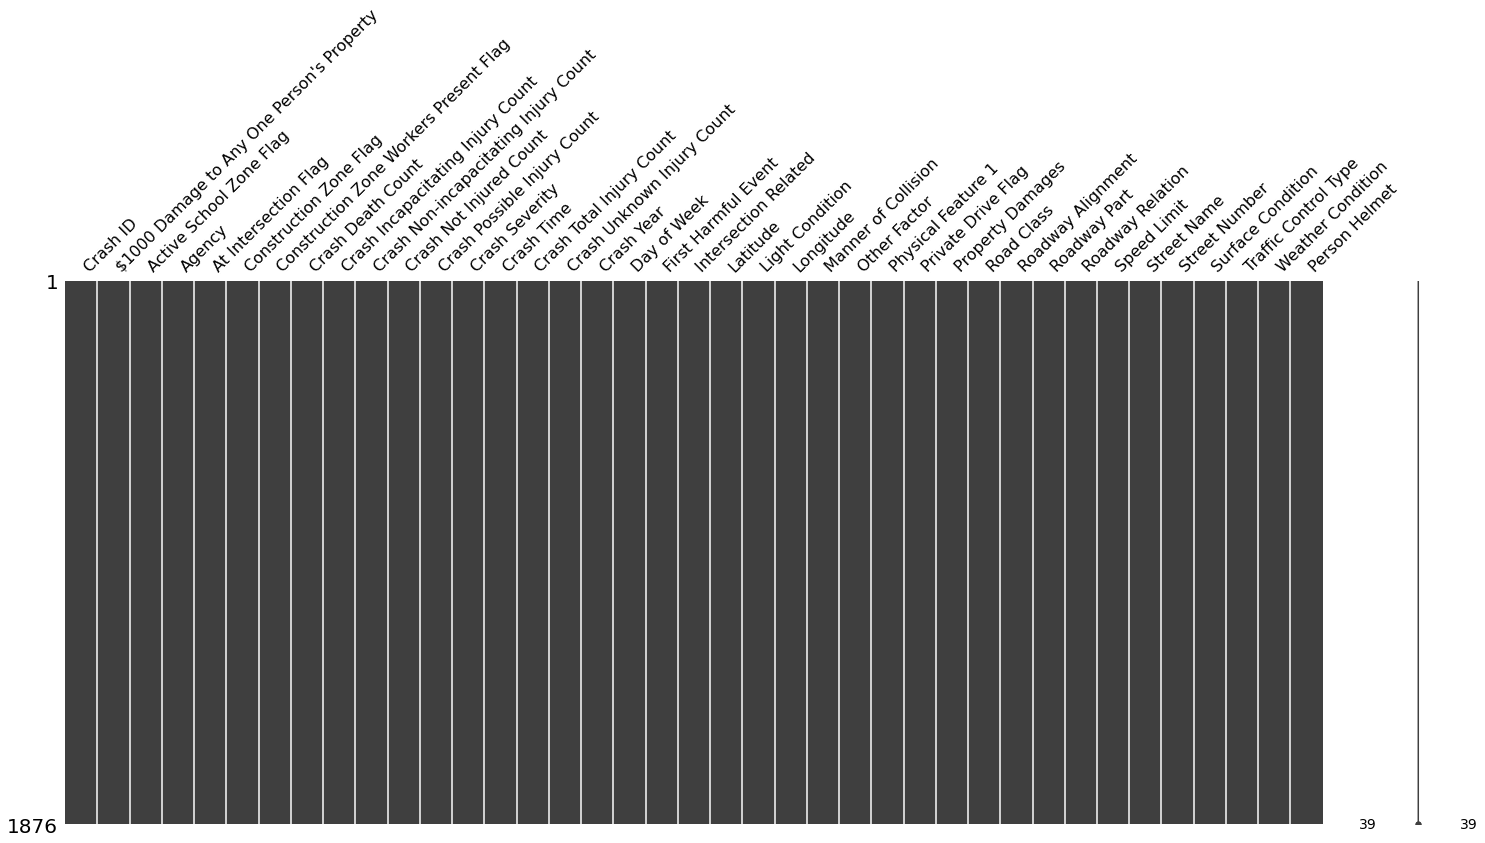

In [67]:
# we may assume that Crash ID is the primary key
# hence drop Case ID
dataset.drop("Case ID", axis=1, inplace = True) 
dataset = dataset.dropna()
msno.matrix(dataset)

We have reach at the point where there is no obvious missing data, thus the data is cleaner than initially.

## Transforming longitude, latitude

In [68]:
from pyproj import Proj, transform
# cartography(map making field), all maps are projected
# then we use Mercator projection here
lons, lats = [], []
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
for lon, lat in list(zip(dataset["Longitude"], dataset["Latitude"])):
    x, y = transform(outProj,inProj,lon,lat)
    lons.append(x)
    lats.append(y)
dataset["MercatorX"] = lons
dataset["MercatorY"] = lats

c:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LEONGT~1\AppData\Local\Temp/ipykernel_11836/1622515699.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.gi

## Saving file

In [69]:
def save_df_csv(csv_str, file_name, path=""):
	f = open(path+file_name, "w")
	f.write(csv_str)
	f.close()
extract_file_name = lambda f: f.split(".")[0]
save_df_csv(dataset.to_csv(index=False, line_terminator="\n"),
file_name=f"{extract_file_name(csv_file_name)} subset.csv")

## To discover outlier

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pprint
%matplotlib inline

In [71]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


In [72]:
#create a list  for column indexing
outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
print(len(outlier_col))

8


In [73]:
#create a dict to store location of outlier
out_dict = {}
new_key=0
for b in outlier_col:
    z = np.abs(stats.zscore(df[b]))
    out_index= np.where(z>3)
    
    # add into dictionary
    new_key+=1
    out_dict[b] = out_index


pprint.pprint(out_dict)

{'Crash Death Count': (array([ 100,  107,  316,  384,  562,  763,  802,  984, 1222, 1351, 1582,
       1611, 1664, 1682, 1814], dtype=int64),),
 'Crash Incapacitating Injury Count': (array([ 539, 1743, 1812], dtype=int64),),
 'Crash Non-incapacitating Injury Count': (array([ 133,  674,  841, 1518], dtype=int64),),
 'Crash Not Injured Count': (array([  15,   17,   43,  154,  166,  179,  240,  300,  328,  387,  402,
        448,  457,  469,  471,  574,  605,  615,  624,  626,  636,  647,
        649,  657,  679,  689,  690,  742,  773,  787,  909,  933,  959,
       1005, 1024, 1090, 1133, 1141, 1159, 1169, 1174, 1231, 1245, 1285,
       1296, 1299, 1427, 1429, 1516, 1517, 1544, 1562, 1593, 1671, 1718,
       1760, 1818, 1820], dtype=int64),),
 'Crash Possible Injury Count': (array([ 215,  269,  377,  493,  626,  891, 1041, 1051, 1061, 1170, 1218,
       1253, 1296, 1517, 1619, 1641, 1748], dtype=int64),),
 'Crash Total Injury Count': (array([ 133,  269,  493,  499,  539,  626,  674,  84

In [74]:
#to extract outlier value

for b in outlier_col:
    print("Outlier value for " + b)
    print(df[b].iloc[out_dict[b]])
    print(" ")
    print("-------------------------------------------------------------- ")

Outlier value for Crash Death Count
100     1
107     1
316     1
384     1
562     1
763     1
802     1
984     1
1222    1
1351    1
1582    1
1611    1
1664    1
1682    1
1814    1
Name: Crash Death Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Incapacitating Injury Count
539     14
1743     3
1812     2
Name: Crash Incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Non-incapacitating Injury Count
133     3
674     4
841     3
1518    3
Name: Crash Non-incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Not Injured Count
15      4
17      4
43      4
154     5
166     4
179     4
240     4
300     4
328     4
387     5
402     7
448     5
457     4
469     4
471     4
574     4
605     6
615     6
624     4
626     7
636     5
647     4
649     6
657     4
679

In [75]:
#In the latest version of Pandas there is an easy way to do exactly this. 
#Column names (which are strings) can be sliced in whatever manner you like
df_measures= pd.DataFrame(df, columns=outlier_col)

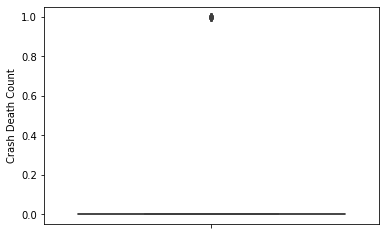

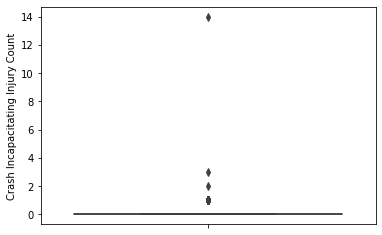

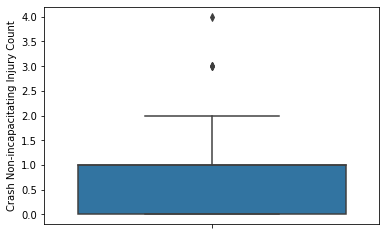

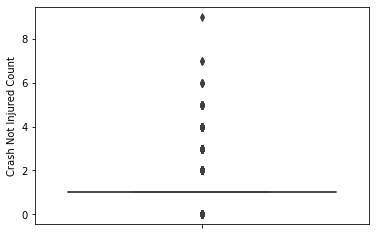

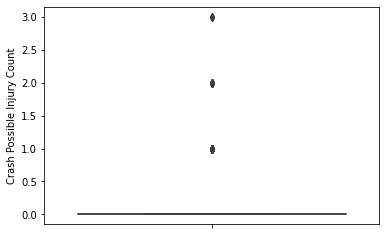

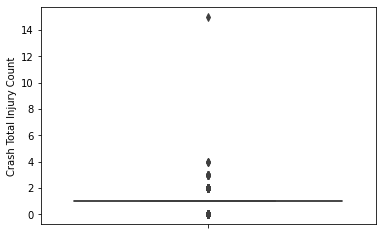

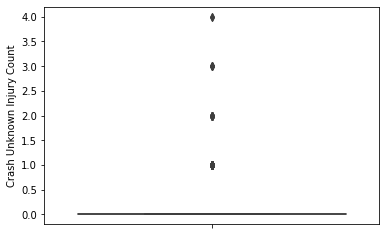

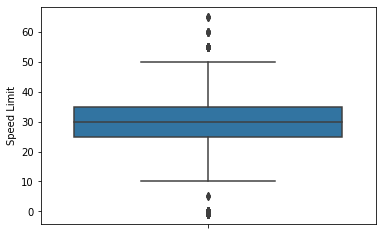

<Figure size 432x288 with 0 Axes>

In [76]:
#Box Plot
for col in outlier_col:
    sns.boxplot( y=df[col] )
    plt.figure()   # plots figure for each iteration

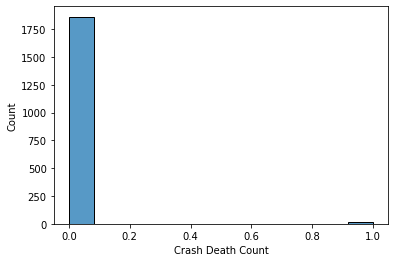

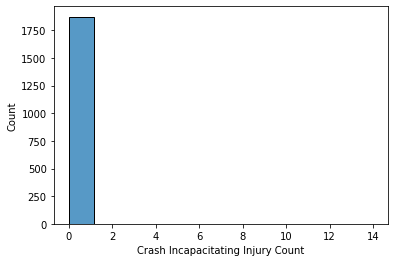

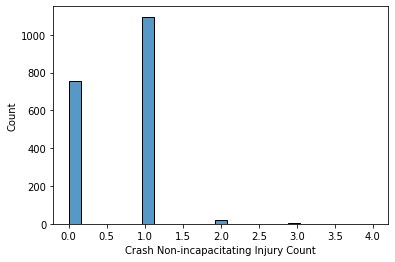

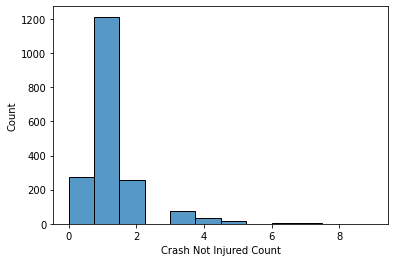

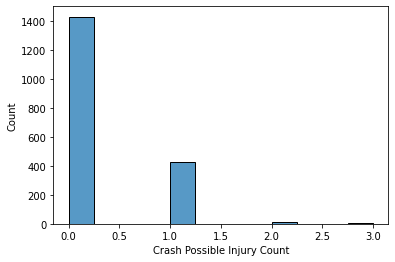

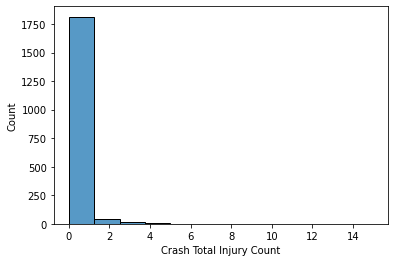

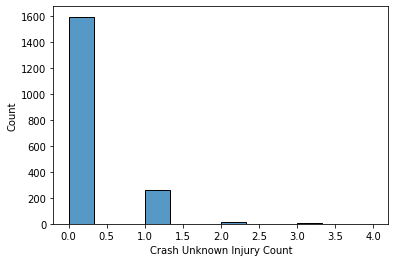

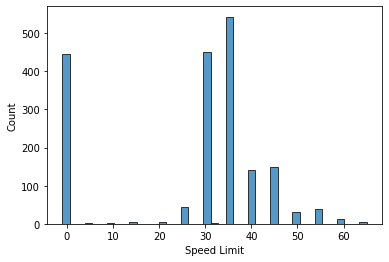

<Figure size 432x288 with 0 Axes>

In [77]:
#Histogram
for col in outlier_col:
    sns.histplot(data=df[col])
    plt.figure()   # plots figure for each iteration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


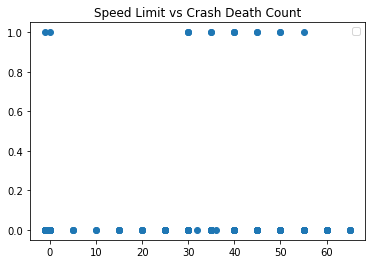

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


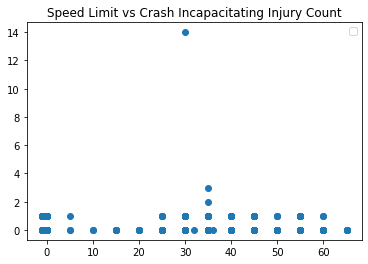

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


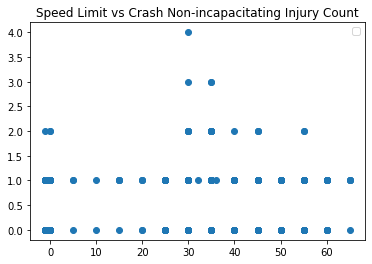

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


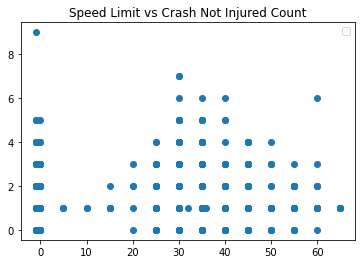

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


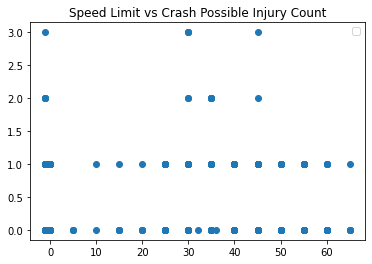

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


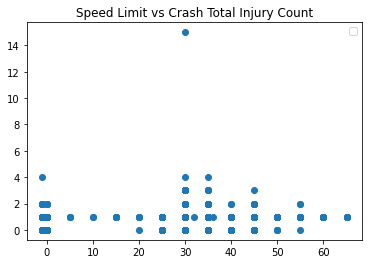

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


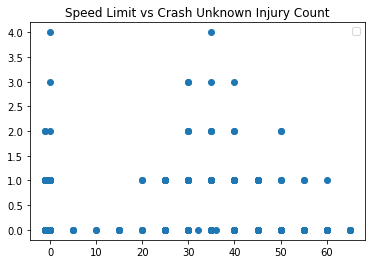

In [78]:
x_col = "Speed Limit"
y_columns = ["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count"]

outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col])
    #ax.set_xlabel(x_col)
    #ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

## Relationship Between Variables

In [79]:
import pandas as pd
import seaborn as sb

In [80]:
df = pd.read_csv("https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv")
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06
3,11318193,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage",-1.088053e+07,3.539795e+06
4,11286981,False,False,Austin Police Department,True,False,No,0,0,1,...,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn,-1.088577e+07,3.534194e+06


<AxesSubplot:>

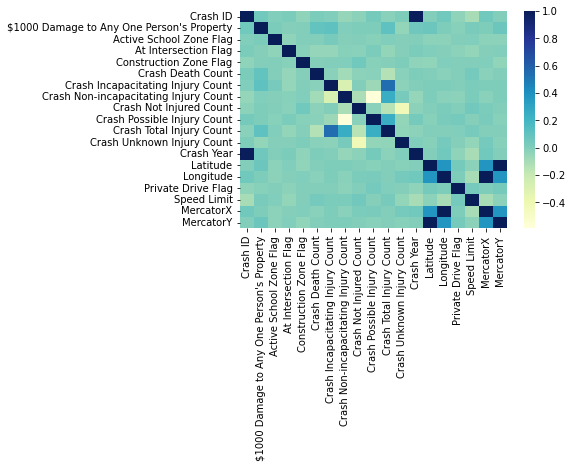

In [81]:
# let we present by heat map

sb.heatmap(df.corr(),cmap="YlGnBu")

In the above particular heatmap with this color map, the dark color means that the correlation is very high. Our diagonal is of course very dark and then we can see that **between crash total injury count and Crash Incapacitating Injury Count** got also dark blue cube, which means that they are very correlative.

We also can see that between MercatorX and longitude are very correlative. It can also be seen that MercatorY has very high correlations with latitude. The combination between "logitude and latitude" and "MercatorY and MercatorX" are correlated together too.
We can explained that MercatorX, longitude, latitude and MercatorY are correlated each other is because they are geographic  measurement that related to each other, and often used and appear in combination. For example, (15°24'15"N, 30°10'3"E) for latitude and longitude. The MercatorY and MercatorX can be converted into latitude and longitude respectively.

In [82]:
# let we just select particular row
list_selected=["Crash Total Injury Count", "Crash Unknown Injury Count", "Speed Limit"]
df_selected=pd.DataFrame(df, columns=list_selected)
df_selected.head()

,Crash Total Injury Count,Crash Unknown Injury Count,Speed Limit
0,1,1,45
1,2,1,35
2,1,0,45
3,1,0,35
4,1,1,30


<AxesSubplot:>

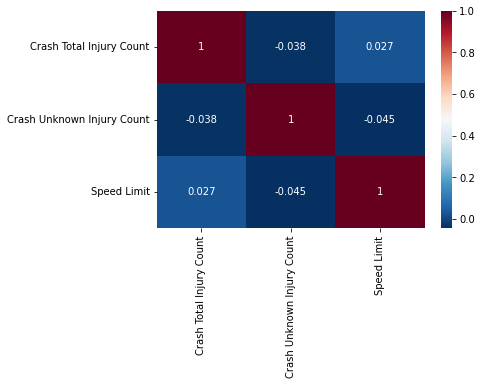

In [83]:
sb.heatmap(df_selected.corr(),cmap="RdBu_r", annot=True)

To zoom in more details, it is clearly show there are no correlation between Crash Total ijury Count, Crash unknown injury count and speed limit.

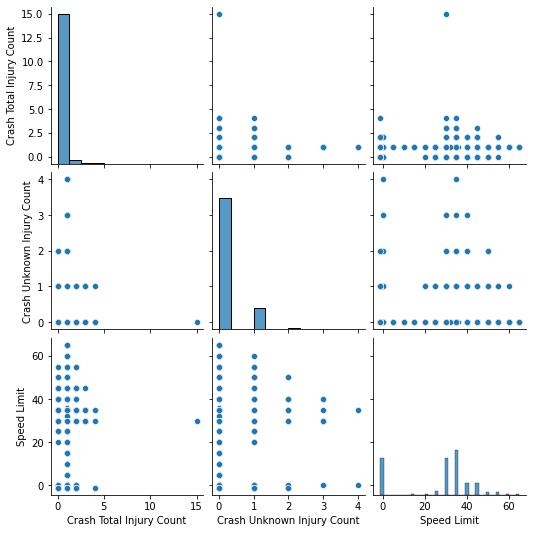

In [84]:
sb.pairplot(df_selected)

Now, we will run a pairplot, which takes every two variables and shows us their scatter versus each other.

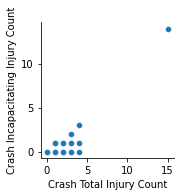

In [85]:
# let create pairplot for crash total injury count and Crash Incapacitating Injury Count.

sb.pairplot(df,
    x_vars="Crash Total Injury Count",
    y_vars="Crash Incapacitating Injury Count",
    diag_kws={'bins':30}
)

When we go deep into the correlation between rash total injury count and Crash Incapacitating Injury Count, we cannot make statement that they have correlation. This is because they creates the plot without the regression line.